In [1]:
# Qiskit Libraries

from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit

In [2]:
# Circuit function for the quantum adder

def quantum_adder(a, b):
    quantum_bits = QuantumRegister(8)
    classical_bits = ClassicalRegister(2)

    circuit = QuantumCircuit(quantum_bits, classical_bits)

    # Qauntum Adder Circuit
    # 4.5.2 Making the Classical Adder a Qauntum Gate,
    # from "Introduction to Classical and Quantum Computing", Thomas G. Wang (2022), p170

    if a==0 and b==1:
        circuit.x(2)
    elif a==1 and b==0:
        circuit.x(0)
    elif a==1 and b==1:
        circuit.x(2)
        circuit.x(0)

    circuit.barrier()

    circuit.cx(1, 3)
    circuit.cx(2, 3)
    circuit.cx(3, 4)
    circuit.cx(0, 4)
    circuit.barrier()
    circuit.ccx(1, 2, 5)
    circuit.ccx(0, 3, 5)
    circuit.barrier()
    circuit.x(7)
    circuit.x(5)
    circuit.x(6)
    circuit.ccx(5, 6, 7)
    circuit.x(5)
    circuit.x(6)

    # Add measurements
    circuit.measure(4, 0)  # Measure sum qubit
    circuit.measure(7, 1)  # Measure carry-out qubit

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(circuit).result()
    counts = result.get_counts()
    plot_histogram(counts)

    # Output
    print("Measurement Results:", counts)

    return circuit, counts

In [3]:
# Call quantum adder function
circuit, counts = quantum_adder(0 , 0)

Measurement Results: {'00': 1024}


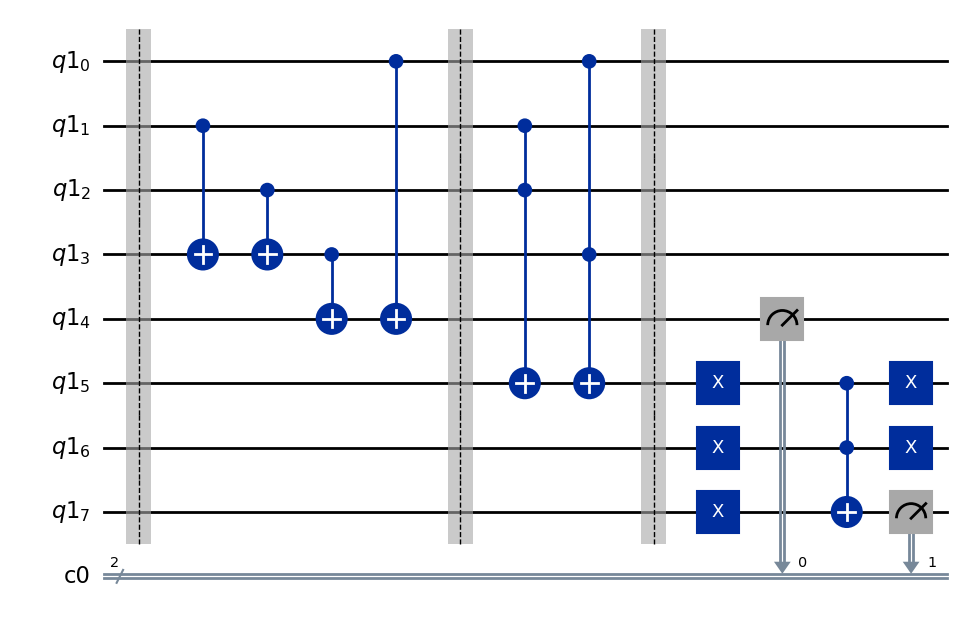

In [4]:
circuit.draw(output='mpl')

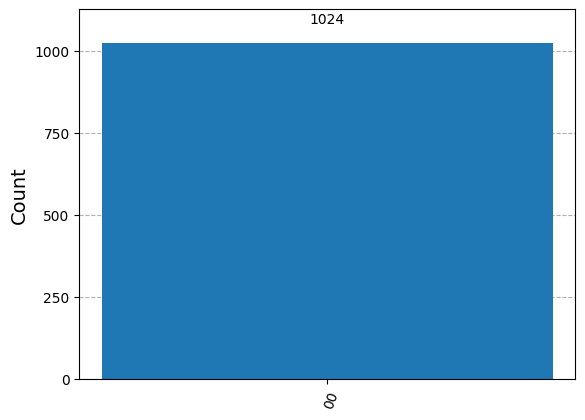

In [5]:
plot_histogram(counts)

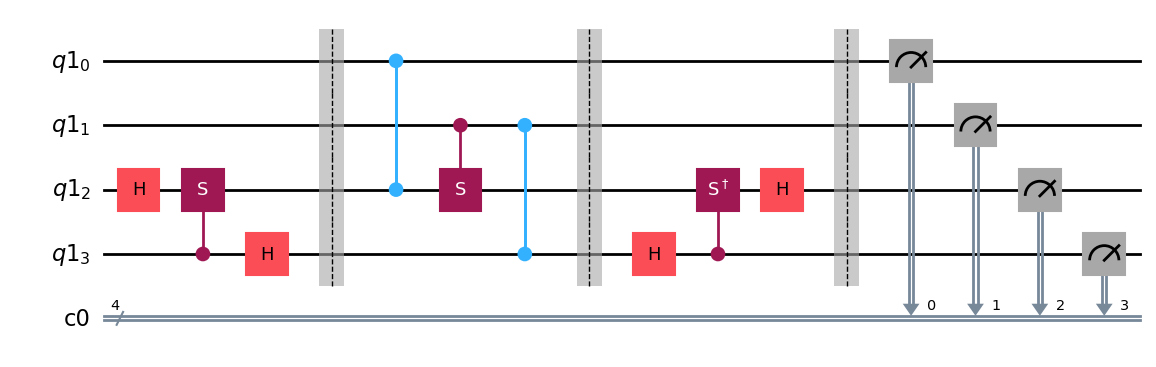

In [2]:
# QFT as quantum adder

quantum_bits = QuantumRegister(4)
classical_bits = ClassicalRegister(4)

qft_circuit = QuantumCircuit(quantum_bits, classical_bits)

qft_circuit.h(2)
qft_circuit.cs(3, 2)
qft_circuit.h(3)
qft_circuit.barrier()
qft_circuit.cz(0, 2)
qft_circuit.cs(1, 2)
qft_circuit.cz(1, 3)
qft_circuit.barrier()
qft_circuit.h(3)
qft_circuit.cs(3, 2).inverse()
qft_circuit.h(2)
qft_circuit.barrier()
qft_circuit.measure(0, 0)
qft_circuit.measure(1, 1)
qft_circuit.measure(2, 2)
qft_circuit.measure(3, 3)


# Plot circuit

qft_circuit.draw(output='mpl')